<a href="https://colab.research.google.com/github/likhithaap/Potato-disease-classification-deep-learning-/blob/main/potato_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
file=os.listdir('.')
print(file)

['.config', 'drive', 'sample_data']


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt


In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("./drive/MyDrive/Datasets/Potato/Test", shuffle= True, image_size=(256, 256), batch_size= 32)

Found 300 files belonging to 3 classes.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory("./drive/MyDrive/Datasets/Potato/Valid", shuffle= True, image_size=(256, 256), batch_size= 32)

Found 300 files belonging to 3 classes.


In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory("./drive/MyDrive/Datasets/Potato/Test", shuffle= True, image_size=(256, 256), batch_size= 32)

Found 300 files belonging to 3 classes.


In [7]:
class_names= dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


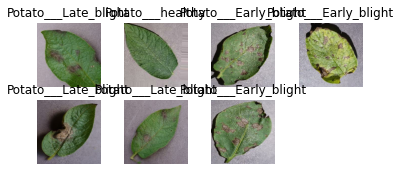

In [8]:
for image_batch, label_batch in dataset.take(1):
 for i in range(7):
    ax= plt.subplot(3,4,i+1)
    print(image_batch[i].shape)
    plt.imshow(image_batch[i].numpy().astype("uint"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [10]:
resize_and_rescale= tf.keras.Sequential(
    [
     layers.experimental.preprocessing.Resizing(256, 256),
     layers.experimental.preprocessing.Rescaling(0.1/255)     
    ]
)

Data augmentation 

In [11]:
data_augment = tf.keras.Sequential([
                     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"
),
                     layers.experimental.preprocessing.RandomRotation(
    0.4
)
])

CNN model structure

In [12]:
model = models.Sequential([
    resize_and_rescale,
    data_augment,
    layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, 'relu'),
    layers.Dense(3, activation='softmax')]
)
model.build(input_shape= (32, 256, 256, 3))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False), metrics=['accuracy'])

In [15]:
history= model.fit(
    dataset,
    epochs = 100,
    batch_size= 32,
    verbose=1,
    validation_data= val_ds,
)

Epoch 1/100
10/10 [==============================] - 53s 5s/step - loss: 1.1013 - accuracy: 0.3900 - val_loss: 1.0916 - val_accuracy: 0.3333
Epoch 2/100
10/10 [==============================] - 2s 160ms/step - loss: 1.0619 - accuracy: 0.4400 - val_loss: 0.9406 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 2s 160ms/step - loss: 0.9814 - accuracy: 0.5067 - val_loss: 0.9827 - val_accuracy: 0.4267
Epoch 4/100
10/10 [==============================] - 2s 162ms/step - loss: 0.8651 - accuracy: 0.5700 - val_loss: 0.8143 - val_accuracy: 0.5567
Epoch 5/100
10/10 [==============================] - 2s 159ms/step - loss: 0.6621 - accuracy: 0.6667 - val_loss: 0.7002 - val_accuracy: 0.6967
Epoch 6/100
10/10 [==============================] - 2s 157ms/step - loss: 0.6353 - accuracy: 0.6833 - val_loss: 0.8644 - val_accuracy: 0.7033
Epoch 7/100
10/10 [==============================] - 2s 157ms/step - loss: 0.5954 - accuracy: 0.7367 - val_loss: 0.6525 - val_accuracy: 0.6567
E

In [16]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 1s 36ms/step - loss: 0.2454 - accuracy: 0.9200


In [17]:
acc= history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
loss_val= history.history["val_loss"]
epochs= 100

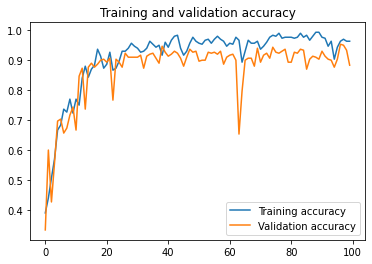

In [18]:
plt.plot(range(epochs), acc, label='Training accuracy')
plt.plot(range(epochs), val_acc, label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.legend(loc = 'lower right')


In [19]:
import numpy as np


Actual label:  Potato___Early_blight
Predicted label:  Potato___Early_blight


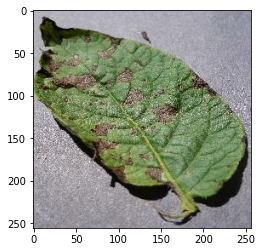

In [20]:
for image_batch, label_batch in test_ds.take(1):
  first_image = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0]
  plt.imshow(first_image)
  print("Actual label: " ,class_names[first_label])
  batch_pred = model.predict(image_batch)
  print("Predicted label: ", class_names[np.argmax(batch_pred[0])])
